## 🧠 Alzheimer's Disease Classification
### The data in total consists of 6400 images.

## Libraries

In [2]:
!pip install -U scikit-image
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
from random import randint
from imblearn.over_sampling import SMOTE
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics,svm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize

import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from typeguard import typechecked
from typing import Optional
from distutils.dir_util import copy_tree, remove_tree


from PIL import Image
import cv2

## SVM Model

### Loading data

In [3]:
train_images = []
train_target = []
test_images = []
test_target = []

path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset'

for images in os.listdir(path+'/train/MildDemented'):
    train_images.append(cv2.imread(path+'/train/MildDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    train_target.append(0)
    
for images in os.listdir(path+'/train/ModerateDemented'):
    train_images.append(cv2.imread(path+'/train/ModerateDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    train_target.append(1)
    
for images in os.listdir(path+'/train/NonDemented'):
    train_images.append(cv2.imread(path + '/train/NonDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    train_target.append(2)

for images in os.listdir(path + '/train/VeryMildDemented'):
    train_images.append(cv2.imread(path + '/train/VeryMildDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    train_target.append(3)

for images in os.listdir(path + '/test/MildDemented'):
    test_images.append(cv2.imread(path + '/test/MildDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    test_target.append(0)

for images in os.listdir(path + '/test/ModerateDemented'):
    test_images.append(cv2.imread(path + '/test/ModerateDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    test_target.append(1)

    
for images in os.listdir(path + '/test/NonDemented'):
    test_images.append(cv2.imread(path + '/test/NonDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    test_target.append(2)
    
for images in os.listdir(path + '/test/VeryMildDemented'):
    test_images.append(cv2.imread(path + '/test/VeryMildDemented/'+images,cv2.IMREAD_GRAYSCALE)/255)
    test_target.append(3)

train_images = np.array(train_images)
train_target = np.array(train_target)
test_images = np.array(test_images)
test_target = np.array(test_target)

### Train and Test set dimensions

In [4]:
train_images=train_images.reshape(len(train_images),-1)
test_images=test_images.reshape(len(test_images),-1)
print(train_images.shape)
print(train_target.shape)
print(test_images.shape)
print(test_target.shape)

(5121, 36608)
(5121,)
(1279, 36608)
(1279,)


In [6]:
test_images[0]

array([0., 0., 0., ..., 0., 0., 0.])

### Fitting SVM Model

In [5]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_images,train_target)

SVC(gamma=0.001)

### Model prediction and confusion matrix

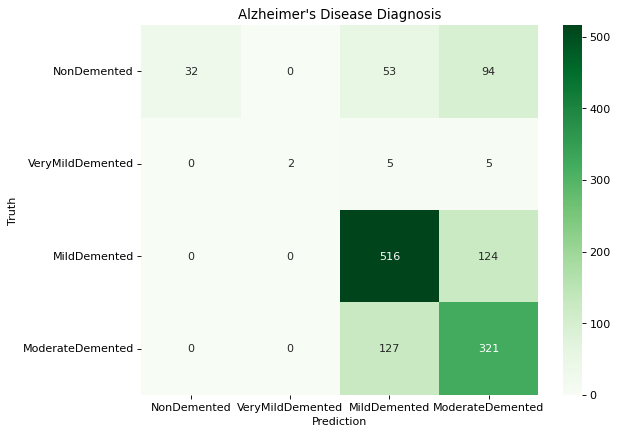

In [6]:
CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']
pred_target = classifier.predict(test_images)
from sklearn.metrics import classification_report, confusion_matrix  
conf_arr = confusion_matrix(test_target,pred_target)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [7]:
conf_arr = np.array([[0,1,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])

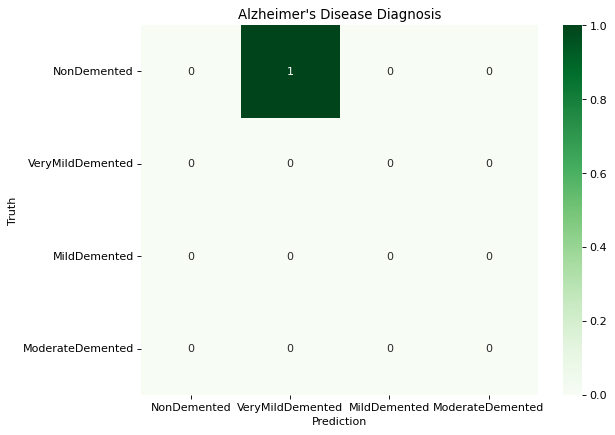

In [8]:
CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']
# pred_target = classifier.predict(test_images)
from sklearn.metrics import classification_report, confusion_matrix  
# conf_arr = confusion_matrix(test_target[0:1],pred_target[0:1])
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

### Model Metrics

In [ ]:
print(classification_report(test_target,pred_target))

## KNN Model (K = 3)

### Function for loading data images

In [9]:
def loadImages(path):
    '''
        parameters
        ----------
        path : input path of the images
        
        returns
        -------
        loadedImages : list of loaded images
    '''
    sample = []
    
    for filename in glob.glob(path):
        
        img = cv2.imread(filename)
        img = skimage.transform.resize(img, (224, 224, 3))
        IMG = np.array(img)
        sample.append(IMG)
        
    return sample

### Data image paths

In [10]:
train_path1 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/*.jpg' 
train_path2 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/*.jpg'
train_path3 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/*.jpg'
train_path4 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/*.jpg'

test_path1 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/*.jpg' 
test_path2 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented/*.jpg'
test_path3 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented/*.jpg'
test_path4 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/*.jpg'

### Loading train-test data

In [11]:
train_ND = loadImages(train_path1)
train_VMD = loadImages(train_path2)
train_MID = loadImages(train_path3)
train_MOD = loadImages(train_path4)

test_ND = loadImages(test_path1)
test_VMD = loadImages(test_path2)
test_MID = loadImages(test_path3)
test_MOD = loadImages(test_path4)

### Labeling the data

In [12]:
#%% CREATION OF DATASETS

df_train_ND = pd.DataFrame({'image':train_ND, 'label': 'ND'})
df_train_VMD = pd.DataFrame({'image':train_VMD, 'label': 'VMD'})
df_train_MID = pd.DataFrame({'image':train_MID, 'label': 'MID'})
df_train_MOD = pd.DataFrame({'image':train_MOD, 'label': 'MOD'})

df_test_ND = pd.DataFrame({'image':test_ND, 'label': 'ND'})
df_test_VMD = pd.DataFrame({'image':test_VMD, 'label': 'VMD'})
df_test_MID = pd.DataFrame({'image':test_MID, 'label': 'MID'})
df_test_MOD = pd.DataFrame({'image':test_MOD, 'label': 'MOD'})

In [13]:
final_data = [df_train_ND, df_train_VMD, df_train_MID, df_train_MOD, df_test_ND, df_test_VMD, df_test_MID, df_test_MOD]
final_data = pd.concat(final_data)
print("Entire data size:",final_data.shape)

Entire data size: (6400, 2)


### TRAIN LABEL SEPARATION

In [14]:
train_data = final_data['image']
labels = final_data['label']
print("Labels Count:",Counter(np.array(labels)))

Labels Count: Counter({'ND': 3200, 'VMD': 2240, 'MID': 896, 'MOD': 64})


### ENCODING THE LABELS

In [15]:
from sklearn.preprocessing import LabelEncoder
onehot = LabelEncoder()
labels = onehot.fit_transform(labels)

### SPLITTING INTO TRAIN AND TEST SET, TRAIN SET WILL BE FURTHER SPLIT INTO TRAIN AND VALIDATION SET

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_data, labels,
                                                  test_size = 0.2,
                                                  stratify = labels,
                                                  shuffle = True,
                                                  random_state = 42)
print('length X_train:', len(X_train))
print('length y_train:', len(y_train))

print('length X_test:',  len(X_test))
print('length y_test:', len(y_test))

X_train = np.array(X_train)
X_test = np.array(X_test)

x_train= np.empty((len(X_train),X_train[0].shape[0],X_train[0].shape[1],X_train[0].shape[2]))
for i,x in enumerate(X_train):
    x_train[i]=X_train[i]
print(x_train.shape)

x_test= np.empty((len(X_test),X_test[0].shape[0],X_test[0].shape[1],X_test[0].shape[2]))
for i,x in enumerate(X_test):
    x_test[i]=X_test[i]
print(x_test.shape)

length X_train: 5120
length y_train: 5120
length X_test: 1280
length y_test: 1280
(5120, 224, 224, 3)
(1280, 224, 224, 3)


### Applying NASNetMobile model features onto the data¶

In [18]:
base_model = NASNetMobile(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)

predictions = Dense(4, activation='tanh')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
test_features=model_feat.predict(x_test)

40/40 [==============================] - 50s 1s/step


### Data spliting of newly feature extracted data

In [19]:
x_train_acc, x_val_acc, y_train_acc, y_val_acc = train_test_split(train_features,y_train,
                                                  test_size = 0.2,
                                                  stratify = y_train,
                                                  shuffle = True,
                                                  random_state = 42)
X_test,y_test=test_features,y_test
print('length X_train:', len(x_train_acc))
print('length y_train:', len(y_train_acc))

print('length X_val:',  len(x_val_acc))
print('length y_val:', len(y_val_acc))

print('length X_test:',  len(X_test))
print('length y_test:', len(y_test))

length X_train: 4096
length y_train: 4096
length X_val: 1024
length y_val: 1024
length X_test: 1280
length y_test: 1280


### Fitting Model and Predicting the validation and test cases (KNN, K = 3)

In [20]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_acc,y_train_acc)
          
y_pred_train= model.predict(x_train_acc)
y_pred_val=model.predict(x_val_acc)
y_pred_test=model.predict(X_test)

### Confusion Matrix (train data)

In [ ]:
conf_mx = confusion_matrix(y_train_acc, y_pred_train)
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_train_acc), index = np.unique(y_train_acc))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
plt.show()

### CONFUSION MATRIX (test data)

In [ ]:
CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

conf_mx = confusion_matrix(y_test, y_pred_test)
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
plt.show()

In [39]:
conf_mx = np.array([[0,1,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])

In [30]:
y_pred_test[0]

2

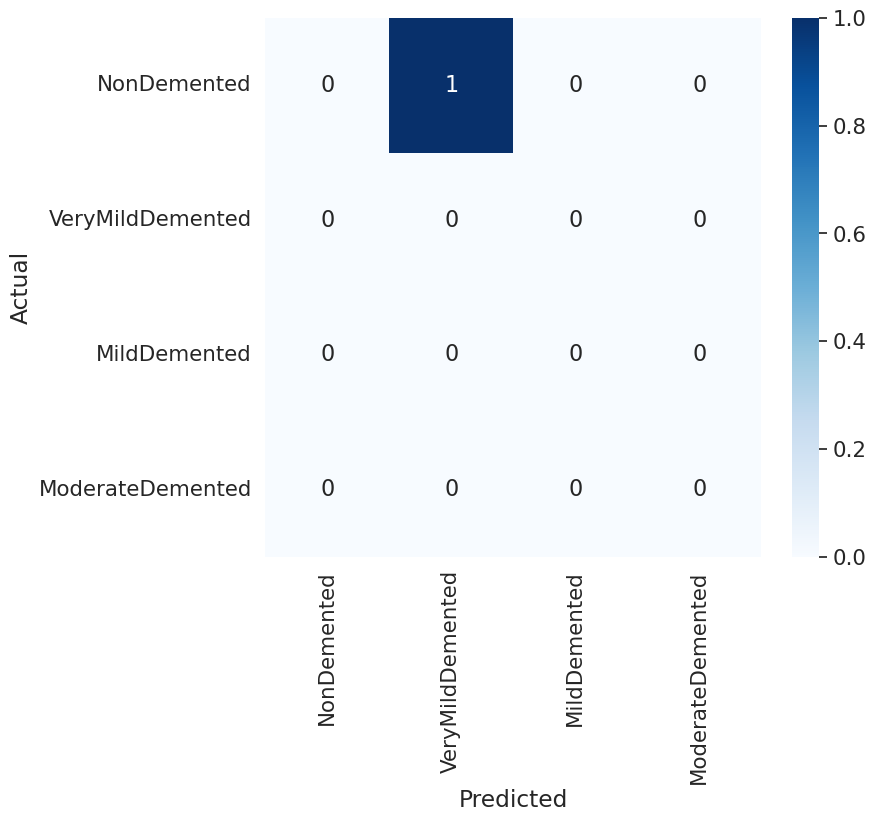

In [40]:
# conf_mx = confusion_matrix(y_test[0:5], y_pred_test[0:5])
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', xticklabels=CLASSES, yticklabels=CLASSES)# font size
plt.show()

### Model Evaluation

In [ ]:
def print_performance_metrics(y_test, max_y_pred_test):
    print('Accuracy:', np.round(metrics.accuracy_score(y_test, max_y_pred_test),4))
    print('Precision:', np.round(metrics.precision_score(y_test, max_y_pred_test, average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, max_y_pred_test, average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, max_y_pred_test, average='weighted'),4))
    #print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test,  max_y_pred_test,multi_class='ovo', average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, max_y_pred_test),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, max_y_pred_test),4)) 
    print('\t\tClassification Report:\n', metrics.classification_report(y_test, max_y_pred_test))

In [ ]:
print('------------------------ train set ------------------------')
print_performance_metrics(y_pred_train,y_train_acc)
print('------------------------ test set ------------------------')
print_performance_metrics(y_pred_test,y_test)